In [13]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

from core.rnn import create_model, train, load_data

LABELS = ["walking", "stairs_down", "stairs_up", "sitting", "standing", "laying"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 64)                13056     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 198       
Total params: 15,334
Trainable params: 15,334
Non-trainable params: 0
_________________________________________________________________
Train on 327 samples, validate on 82 samples
Epoch 1/50
327/327 [==============================] - 4s 13ms/step - loss: 1.7606 - acc: 0.2661 - val_loss: 1.7034 - val_acc: 0.4146
Epoch 2/50
327/327 [==============================] - 3s 11ms/step - loss: 1.6391 - acc: 0.4373 - val_loss: 1.5469 - val_acc: 0.3659
Epoch 3/50
327/327 [==============================] - 3s 11ms/step - loss: 1.4198 - acc: 0.

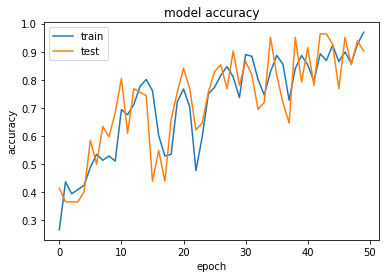

In [16]:
model = create_model(128, LABELS)

x, y = load_data("../data/uci_train_6_labels_single.csv", 128, LABELS)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=np.random.randint(0, 42)
)

train(
    model,
    x_train,
    y_train,
    x_test,
    y_test,
    epochs=50,
    batch_size=16
)

In [17]:
x_real_test, y_real_test = load_data("../data/uci_test_6_labels.csv", 128, LABELS)

[_, accuracy] = model.evaluate(x_real_test, y_real_test, 512)

print(f"\nTest Accuracy: {accuracy}")

2947/2947 [==============================] - 0s 150us/step

Test Accuracy: 0.4811672892738772
